In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data=pd.read_excel('Data_train.xlsx')

pd.set_option('display.max_columns',None)

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [56]:
train_data.shape

(10682, 12)

In [4]:
train_data.dropna(inplace=True)

In [5]:
train_data['journey_day'] = pd.to_datetime(train_data["Date_of_Journey"],format = "%d/%m/%Y").dt.day
train_data['journey_month'] = pd.to_datetime(train_data["Date_of_Journey"],format = "%d/%m/%Y").dt.month

In [6]:
train_data.drop(["Date_of_Journey"],axis=1,inplace = True)

In [65]:
train_data['Dept_Hour'] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data['Dept_Min'] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

KeyError: 'Dep_Time'

In [8]:
train_data['Arrival_Hour'] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data['Arrival_Minute'] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [9]:
train_data.drop(["Arrival_Time"],axis=1,inplace = True)

In [11]:
duration = list(train_data["Duration"])
for i in range(len(duration)):
    
    if len(duration[i].split()) != 2:
        
        if 'h' in duration[i]:
            
            
            
        
            duration[i] = duration[i].strip() + "0m"
            
        else:
            
            duration[i] ="0h" + duration[i]
            
            
             
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    
    
               
                           
    duration_hours.append(int(duration[i].split(sep ="h")[0]))
    
    duration_mins.append((duration[i].split(sep ="m")[0].split()[-1]))
    
       

In [13]:

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [14]:
train_data.drop("Duration",axis=1,inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
Airline = train_data[["Airline"]]

In [20]:
Airline = pd.get_dummies(Airline , drop_first = True)


In [21]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


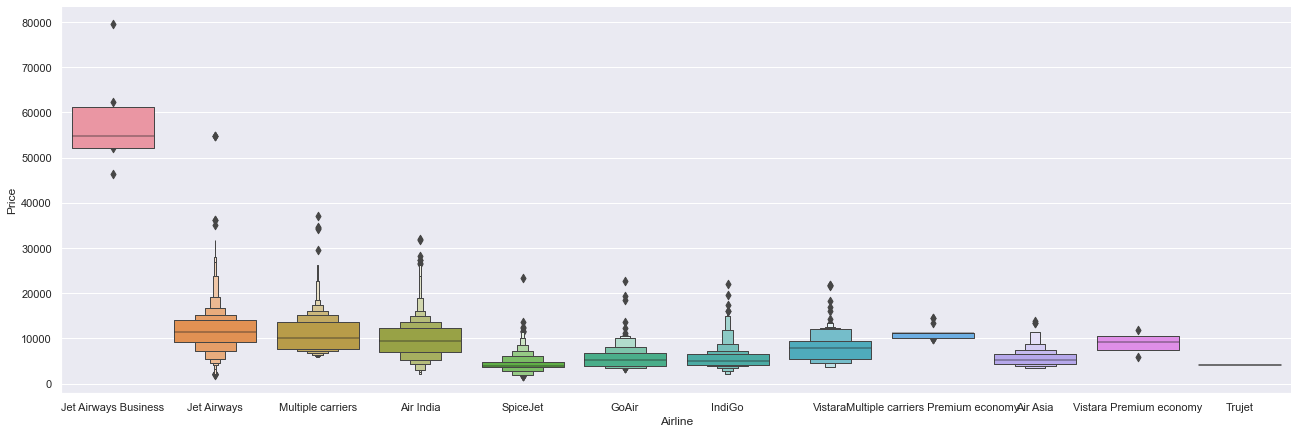

In [31]:
sns.catplot(x ='Airline' , y = 'Price' , data = train_data.sort_values('Price', ascending = False),height = 6, aspect = 3,kind = 'boxen')

In [28]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source , drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


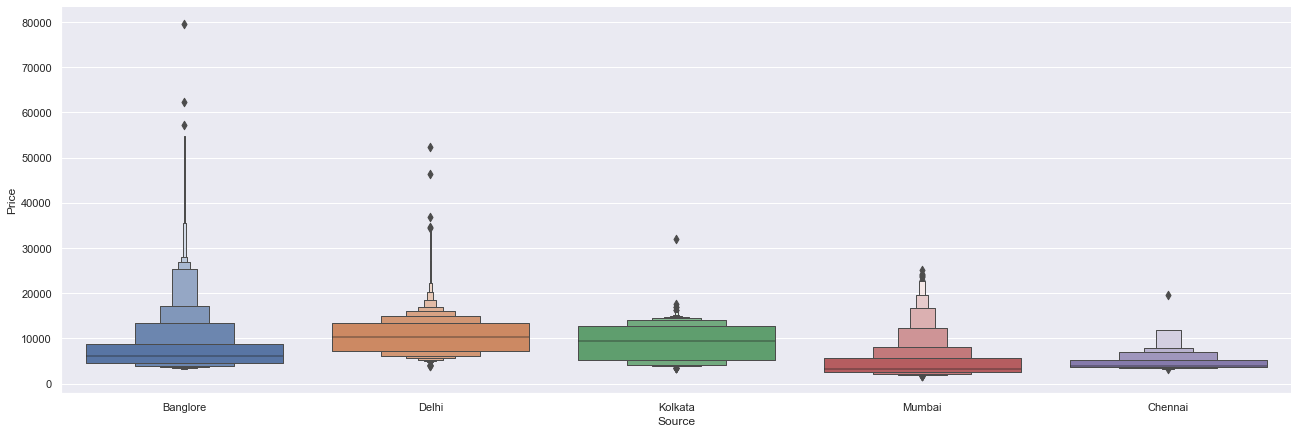

In [32]:
sns.catplot(x ='Source' , y = 'Price' , data = train_data.sort_values('Price', ascending = False),height = 6, aspect = 3,kind = 'boxen')

In [35]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Source , drop_first = True)
Destination.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,non-stop,No info,12648,1,3,11,30,14,10


In [38]:
train_data.drop(["Route" , "Additional_Info"],axis = 1,inplace = True)

In [39]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,22:20,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,1 stop,13302,1,3,16,50,21,35


In [40]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
train_data.replace({'non-stop':0,'1 stops':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace = True)
train_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,22:20,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,1,13302,1,3,16,50,21,35


In [49]:
data_train = pd.concat([train_data , Airline , Source , Destination],axis = 1)

In [51]:
data_train.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,22:20,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,05:50,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,09:25,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,18:05,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,16:50,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [59]:
data_train.head()

,Dep_Time,Total_Stops,Price,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,22:20,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,05:50,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,09:25,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,18:05,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,16:50,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
data_train.shape

(10682, 28)

In [67]:
test_data = pd.read_excel('Test_set.xlsx')

In [68]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [69]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [72]:
test_data.dropna(inplace=True)

In [73]:
test_data['journey_day'] = pd.to_datetime(test_data["Date_of_Journey"],format = "%d/%m/%Y").dt.day
test_data['journey_month'] = pd.to_datetime(test_data["Date_of_Journey"],format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace = True)

In [ ]:
test_data['Dept_Hour'] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data['Dept_Min'] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"],axis=1,inplace = True)

In [74]:
test_data['Arrival_Hour'] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data['Arrival_Minute'] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis=1,inplace = True)

In [ ]:
duration = list(test_data["Duration"])
for i in range(len(duration)):
    
    if len(duration[i].split()) != 2:
        
        if 'h' in duration[i]:
            
            
            
        
            duration[i] = duration[i].strip() + "0m"
            
        else:
            
            duration[i] ="0h" + duration[i]
            
            
             
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    
    
               
                           
    duration_hours.append(int(duration[i].split(sep ="h")[0]))
    
    duration_mins.append((duration[i].split(sep ="m")[0].split()[-1]))
    
     

In [ ]:
        test_data.drop("Duration",axis=1,inplace = True)

In [76]:
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline , drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [78]:
Source = test_data[['Source']]
Source = pd.get_dummies(Source , drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [79]:
test_data['Route']

test_data.drop(["Route" , "Additional_Info"],axis = 1,inplace = True)

test_data["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [95]:
test_data.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,journey_day,journey_month,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,17:30,10h 55m,1 stop,6,6,4,25
1,IndiGo,Kolkata,Banglore,06:20,4h,1 stop,12,5,10,20
2,Jet Airways,Delhi,Cochin,19:15,23h 45m,1 stop,21,5,19,0
3,Multiple carriers,Delhi,Cochin,08:00,13h,1 stop,21,5,21,0
4,Air Asia,Banglore,Delhi,23:55,2h 50m,0,24,6,2,45


In [96]:
test_data.replace({'non-stop':0,'1 stops':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace = True)

data_test = pd.concat([test_data , Airline , Source , Destination],axis = 1)


In [97]:

data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_test.shape

(10682, 25)

In [99]:
X=data_train.loc[:,[ 'Total_Stops', 'journey_day', 'journey_month',
       'Dept_Hour', 'Dept_Min', 'Arrival_Hour', 'Arrival_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']]
X.head()

,Total_Stops,journey_day,journey_month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Chennai,Source_Delhi,Source_Delhi,Source_Kolkata,Source_Kolkata,Source_Mumbai,Source_Mumbai,Source_Chennai,Source_Chennai,Source_Delhi,Source_Delhi,Source_Kolkata,Source_Kolkata,Source_Mumbai,Source_Mumbai
0,0,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0
2,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0
3,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0
4,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
y=data_train.iloc[:, 2]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

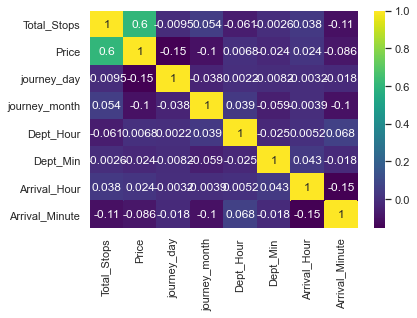

In [109]:
sns.heatmap(train_data.corr(),annot = True,cmap='viridis')

In [111]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [116]:
print(selection.feature_importances_)

[3.01421171e-01 1.30860172e-01 6.71419888e-02 3.92286091e-02
 3.11036531e-02 3.64153010e-02 2.64592407e-02 1.35445136e-02
 1.74983536e-03 1.92865721e-02 1.52683895e-01 6.73372338e-02
 1.76763833e-02 9.16985835e-04 5.51966712e-03 1.67895769e-04
 5.90177414e-03 8.68802208e-05 5.44394188e-04 6.27025362e-04
 1.10065503e-02 1.59580094e-02 3.71160382e-03 2.86196050e-03
 5.89997748e-03 4.16608855e-03 4.96525986e-04 5.23022633e-04
 9.18230494e-03 9.84347782e-03 3.78239492e-03 3.00096518e-03
 4.14608420e-03 6.74784288e-03]


<AxesSubplot:>

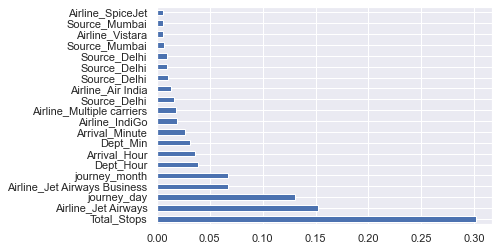

In [120]:
feat_importances = pd.Series(selection.feature_importances_,index =X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [150]:
y_pred = reg_rf.predict(X_test)

In [154]:
reg_rf.score(X_train,y_train)

0.9552093312118709

C:\Users\V2882\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

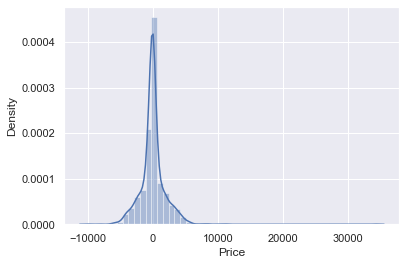

In [155]:
sns.distplot(y_test-y_pred)

C:\Users\V2882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y_pred')

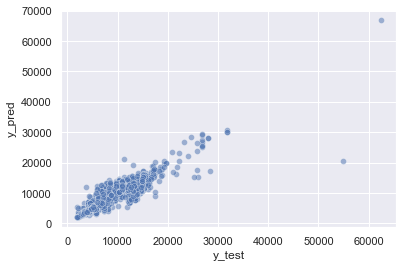

In [157]:
sns.scatterplot(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [161]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [165]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE= np.sqrt(MSE)

In [166]:
MSE

3882491.3068796135

In [167]:
MAE

1195.7788488214067

In [168]:
RMSE

1970.4038436015126

In [170]:

    #HYPERPARAMETER TUNING




In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [181]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [184]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring = 'neg_mean_squared_error',n_iter = 10,cv=2,verbose=5,random_state=42,n_jobs=1)

In [186]:
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-6166793.114, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-7327258.482, total=   5.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-5013872.429, total=   7.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.1s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-6308320.652, total=   7.8s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   25.9s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, score=-5953945.884, total=   4.0s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, score=-6819036.939, total=   4.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, score=-4564774.756, total=   7.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, score=-5595401.332, total=   7.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_feature

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.3min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=5)

In [188]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [190]:
prediction=rf_random.predict(X_test)

C:\Users\V2882\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

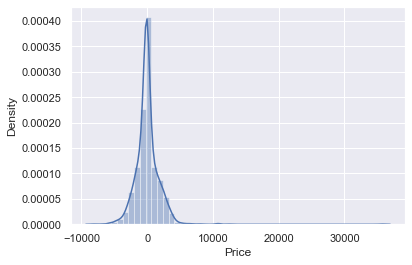

In [191]:
sns.distplot(y_test-prediction)

C:\Users\V2882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y_pred')

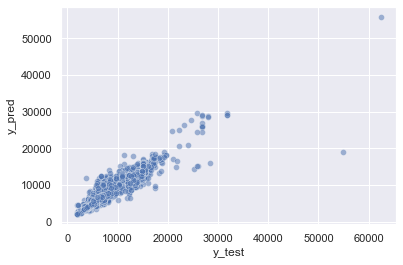

In [197]:
sns.scatterplot(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [200]:
MSE=mean_squared_error(y_test,prediction)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,prediction)

In [202]:
MSE



3366404.6935115396

In [203]:
RMSE

1834.7764696309846

In [204]:
MAE

1138.5198503663073

In [205]:



#PICKLE

In [215]:




import pickle

file=open('flightprediction_rf.pkl','wb')
pickle.dump(rf_random,file)

In [220]:
model=open('flightprediction_rf.pkl','rb')

forest=pickle.load(model)

In [219]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test,prediction)

0.8450371185407967